In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/dataset

/content/gdrive/MyDrive/Colab Notebooks/dataset


In [ ]:
# Path to where you want to extract the dataset in Colab's temporary storage
# '/content/' is a good place as it's directly accessible by Colab's runtime.
UNZIP_PATH = '/content/my_extracted_dataset'
ZIP_FILE_NAME = 'train.zip' # Make sure this matches your zip file name

# Create the directory if it doesn't exist
!mkdir -p "$UNZIP_PATH"

# Unzip the file
!unzip -q "$ZIP_FILE_NAME" -d "$UNZIP_PATH"

print(f"Dataset unzipped to: {UNZIP_PATH}")
# List contents to verify
!ls "$UNZIP_PATH"
!ls "$UNZIP_PATH/train" # Verify inner structure

Dataset unzipped to: /content/my_extracted_dataset
train
 Audi		 'Mahindra Scorpio'   Swift	    'Toyota Innova'
'Hyundai Creta'  'Rolls Royce'	     'Tata Safari'


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define your image dimensions and batch size
IMAGE_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 7 # IMPORTANT: Set this to the number of unique classes in your dataset

# Path to your main dataset directory in Colab
# Adjust this based on how you uploaded/mounted your data
# Example for Google Drive:
DATA_DIR = '/content/my_extracted_dataset/train'
# Example for direct upload/Kaggle unzip:
# DATA_DIR = '/content/my_image_dataset' # or whatever your unzipped path is


# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

print("Loading training data...")
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    seed=42
)

print("Loading validation data...")
validation_generator = validation_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    seed=42
)

class_names = list(train_generator.class_indices.keys())
print(f"Detected classes: {class_names}")

Loading training data...
Found 2684 images belonging to 7 classes.
Loading validation data...
Found 668 images belonging to 7 classes.
Detected classes: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 20 # Adjust as needed

print(f"Starting training for {EPOCHS} epochs...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)
print("Training finished.")

Starting training for 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - accuracy: 0.2205 - loss: 1.9829 - val_accuracy: 0.2641 - val_loss: 1.8444
Epoch 2/20
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1562 - loss: 1.9413

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1562 - loss: 1.9413 - val_accuracy: 0.2531 - val_loss: 1.8468
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.2852 - loss: 1.8397 - val_accuracy: 0.4078 - val_loss: 1.7433
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 1.6590 - val_accuracy: 0.4031 - val_loss: 1.7347
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.3408 - loss: 1.7624 - val_accuracy: 0.4156 - val_loss: 1.6443
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3750 - loss: 1.7763 - val_accuracy: 0.4500 - val_loss: 1.6269
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.3755 - loss: 1.7127 - val_accuracy: 0.4516 - val_loss: 1.4909
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3750 - loss: 1.5794 - val_accuracy: 0.4484 - val_loss: 1.4887
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.4087 - loss: 1.6282 - val_accuracy: 0.5141 - val_loss

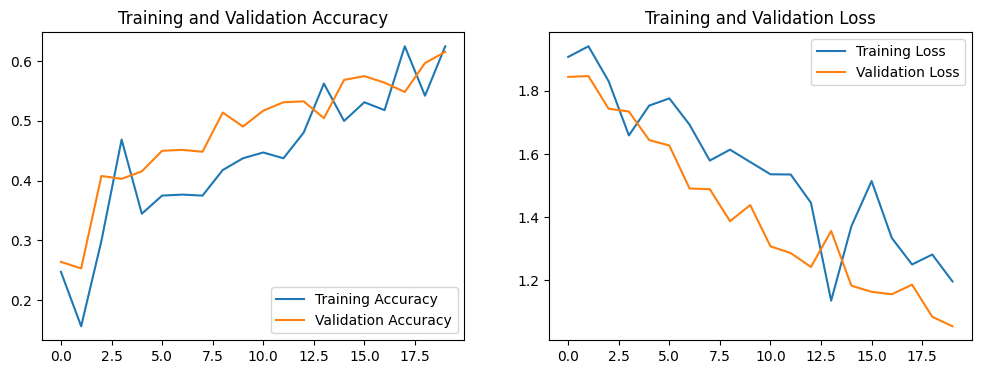

In [ ]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.save('car_model.h5')


In [29]:
from google.colab import files
files.download('car_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from google.colab import files
uploaded = files.upload()


Saving 20210201095422_Tata_Safari_static.jpg to 20210201095422_Tata_Safari_static.jpg


In [24]:
from PIL import Image

# Get the uploaded file name
file_name = next(iter(uploaded))

# Load and preprocess the image
img = Image.open(file_name).convert('RGB')
IMAGE_SIZE = 128
img = img.resize((IMAGE_SIZE, IMAGE_SIZE))  # Resize to match model input
img_array = np.array(img) / 255.0  # Normalize to 0–1
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [25]:
# Make prediction
predictions = model.predict(img_array)

# Get class with highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Get class name
predicted_label = class_names[predicted_class]

print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class Index: 5
Predicted Label: Tata Safari


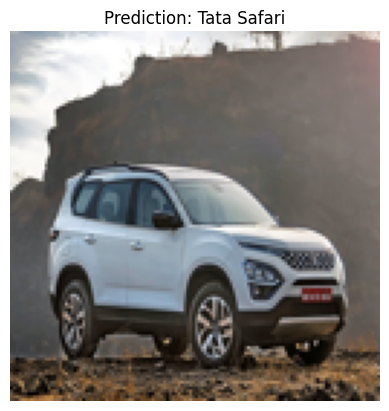

In [26]:
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()
